In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

# Mann- Whitney U test
from itertools import combinations
from scipy.stats import mannwhitneyu

#Dunnov test | Kruskal-Wallis test
from scipy.stats import kruskal
import scikit_posthocs as sp

In [2]:
# Teraz budem pisat kody inspirovane podla Final_code_tests_vizualization_Kostelec_Groups.ipynb (C:\Users\matus\Downloads\Kostelec_finland\29_2_2024)
# najprv urobim median a std pre kontrolnu skupinu D

In [3]:
# import data
# Pre testovanie musim vsetky skupiny dat do samostanych dataframov podla datumu
# CASI
casi_data_03_06_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/CASI_03_06_2022_all_loc.csv')
casi_data_17_07_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/CASI_17_07_2022_all_loc.csv')
casi_data_04_08_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/CASI_04_08_2022_all_loc.csv')
casi_data_23_09_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/CASI_23_09_2022_all_loc.csv')
casi_data_20_10_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/CASI_20_10_2022_all_loc.csv')
casi_data_11_08_2023 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/CASI_11_08_2023_all_loc.csv')

# SASI
# Vyfiltrovanie dát pre vsetky dátumy
sasi_data_03_06_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/SASI_03_06_2022_all_loc.csv')
sasi_data_17_07_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/SASI_17_07_2022_all_loc.csv')
sasi_data_04_08_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/SASI_04_08_2022_all_loc.csv')
sasi_data_23_09_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/SASI_23_09_2022_all_loc.csv')
sasi_data_20_10_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/SASI_20_10_2022_all_loc.csv')
sasi_data_11_08_2023 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/SASI_11_08_2023_all_loc.csv')

In [180]:
# Pre kazdy datum sa toto robí samostatne
# CASI
df_casi = casi_data_11_08_2023

# SASI
df_sasi = sasi_data_11_08_2023


In [181]:
#---------------------------------------
#---------------------------------------
#----------Kruskal-Wallis test----------
#---------------------------------------
#---------------------------------------

In [182]:
# KRUSKAL-WALLIS test
# CASI
from scipy.stats import kruskal

# Identifikácia stĺpcov pre vlnové dĺžky a skupiny
wavelength_columns_casi = [col for col in df_casi.columns if col.startswith('b_')]
group_column_casi = 'Group'

# Výsledky Kruskal-Wallis testu pre každú vlnovú dĺžku
kruskal_results_casi = {}

for wavelength_casi in wavelength_columns_casi:
    # Zbierka dát pre každú skupinu
    data_by_group_casi = [df_casi[df_casi[group_column_casi] == group][wavelength_casi].dropna() for group in df_casi[group_column_casi].unique()]
    
    # Vykonanie Kruskal-Wallis testu
    stat, p_value = kruskal(*data_by_group_casi)
    
    # Uloženie výsledkov
    kruskal_results_casi[wavelength_casi] = p_value

# Konverzia výsledkov na DataFrame pre ľahšiu vizualizáciu
kruskal_results_df_casi = pd.DataFrame(list(kruskal_results_casi.items()), columns=['Wavelength', 'P-Value'])

In [183]:
# KRUSKAL-WALLIS test
# SASI (CS)
from scipy.stats import kruskal

# Identifikácia stĺpcov pre vlnové dĺžky a skupiny
wavelength_columns_cs = [col for col in df_sasi.columns if col.startswith('b_')]
group_column_cs = 'Group'

# Výsledky Kruskal-Wallis testu pre každú vlnovú dĺžku
kruskal_results_cs = {}

for wavelength_cs in wavelength_columns_cs:
    # Zbierka dát pre každú skupinu
    data_by_group_cs = [df_sasi[df_sasi[group_column_cs] == group][wavelength_cs].dropna() for group in df_sasi[group_column_cs].unique()]
    
    # Vykonanie Kruskal-Wallis testu
    stat, p_value = kruskal(*data_by_group_cs)
    
    # Uloženie výsledkov
    kruskal_results_cs[wavelength_cs] = p_value

# Konverzia výsledkov na DataFrame pre ľahšiu vizualizáciu
kruskal_results_df_sasi = pd.DataFrame(list(kruskal_results_cs.items()), columns=['Wavelength', 'P-Value'])

kruskal_results_df_sasi.head()

,Wavelength,P-Value
0,b_49_1077.5,2.092478e-13
1,b_50_1092.5,3.816411e-13
2,b_51_1107.5,8.954318e-13
3,b_52_1122.5,2.060131e-12
4,b_53_1137.5,6.721052e-12


In [184]:
# spojenie CASI a CS vysledkov Kruskal-Wallis testu do jedneho dataframu
df_kruskal = pd.concat([kruskal_results_df_casi, kruskal_results_df_sasi])
df_kruskal

,Wavelength,P-Value
0,b_1_384.55,1.999666e-04
1,b_2_398.80,6.364755e-16
2,b_3_413.05,2.935559e-27
3,b_4_427.31,5.716023e-33
4,b_5_441.56,2.529641e-38
...,...,...
87,b_136_2382.5,7.031829e-21
88,b_137_2397.5,2.453357e-21
89,b_138_2412.5,1.915096e-22
90,b_139_2427.5,3.005863e-19


In [185]:
# Uloženie df_kruskal (teda Kruskal-Wallisoveho testu CASI spolu s CS) do súboru CSV
df_kruskal.to_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Kruskal/Kruskal_Wallis_p_values_df_11_08_2023.csv', index=True, sep=',')
print("DataFrame bol úspešne uložený do súboru 'Kruskal_Wallis_p_values_df_3_6_2022.csv'.")

DataFrame bol úspešne uložený do súboru 'Kruskal_Wallis_p_values_df_3_6_2022.csv'.


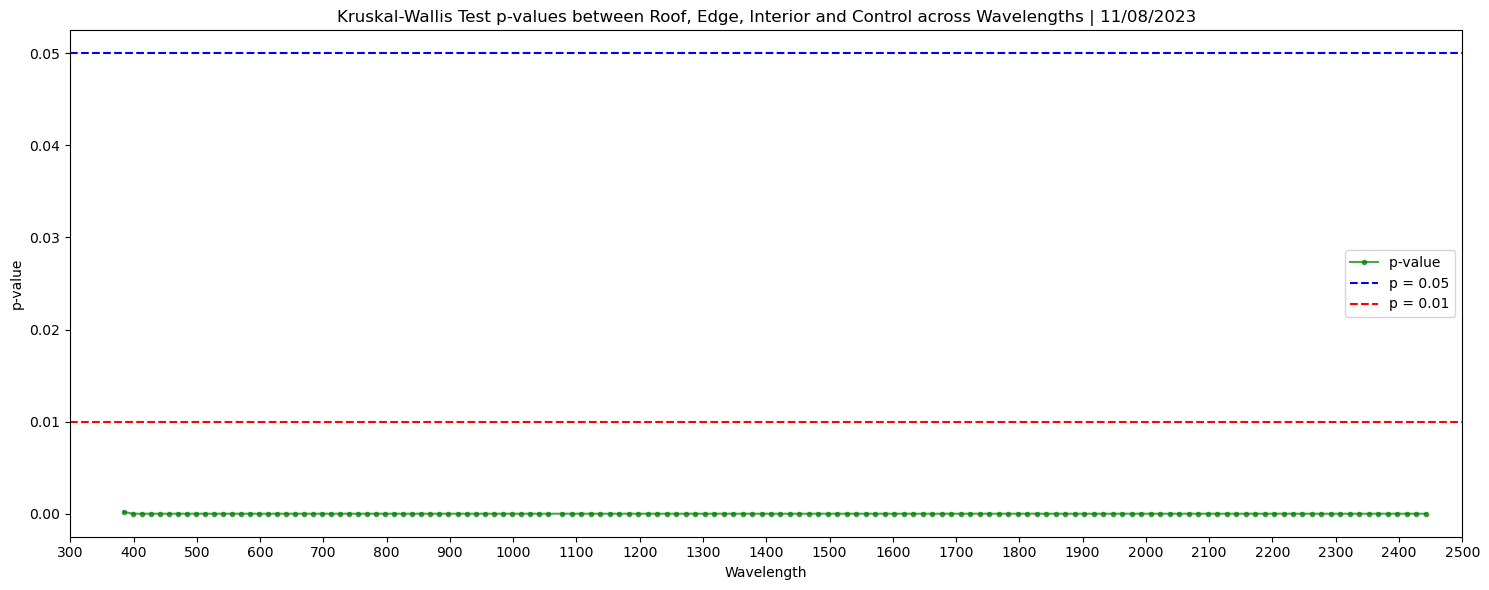

In [186]:
# Predpokladáme, že 'df_kruskal' je už načítaný dataframe

# Extrahujeme číslo za druhým podčiarkovníkom v stĺpci 'Wavelength'
df_kruskal['Wavelength_Number'] = df_kruskal['Wavelength'].str.extract(r'.*_(\d+.\d+)$').astype(float)

# Inicializujeme novú figúru pre vykreslenie
plt.figure(figsize=(15,6))

# Vykreslenie hodnôt P-hodnoty a spojenie bodiek zelenou čiarou
plt.plot(df_kruskal['Wavelength_Number'], df_kruskal['P-Value'], 'g.-', alpha=0.7, label='p-value ')

# Označenie úrovne významnosti
plt.axhline(y=0.05, color='b', linestyle='--', label='p = 0.05')
plt.axhline(y=0.01, color='r', linestyle='--', label='p = 0.01')

# Nastavenie titulku a osí v slovenčine
plt.title('Kruskal-Wallis Test p-values between Roof, Edge, Interior and Control across Wavelengths | 11/08/2023')
plt.xlabel('Wavelength')
plt.ylabel('p-value')

# Nastavenie vlastných značiek na osi x s krokom 100, začínajúc pri 300 a končiac pri 2500
custom_ticks = list(range(300, 2501, 100))
plt.xticks(custom_ticks)

# Otočenie popisov značiek na osi x pre lepšiu čitateľnosť
plt.xticks(rotation=0)

# Nastavenie limitov pre os x
plt.xlim(300, 2500)

# Pridanie legendy
plt.legend()

# Aby popisky neboli odrezané
plt.tight_layout()

# Save the figure to a PNG file
plt.savefig('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Kruskal/Kruskal_Wallis_11_08_2023.png')

# Zobrazenie grafu
plt.show()


In [187]:
#---------------------------------------
#---------------------------------------
#----------Mann-Whitney U test----------
#---------------------------------------
#---------------------------------------

In [188]:
# CASI Mann-Whitney U test
# BEZ BONFERONIHO KOREKCIE
# Identifikácia unikátnych skupín
groups = df_casi['Group'].unique()

# Vytvorenie všetkých možných kombinácií skupín pre testy
group_pairs = list(combinations(groups, 2))

# Príprava DataFrame na výsledky Mann-Whitney U testu
# Indexy budú vlnové dĺžky, stĺpce budú kombinácie skupín
wavelength_columns = [col for col in df_casi.columns if col.startswith('b_')]
results_mann_casi = pd.DataFrame(index=wavelength_columns, columns=[f'{pair[0]}-{pair[1]}' for pair in group_pairs])

# Vykonanie Mann-Whitney U testu pre každú kombináciu skupín na každej vlnovej dĺžke
for pair in group_pairs:
    group1_data = df_casi[df_casi['Group'] == pair[0]][wavelength_columns]
    group2_data = df_casi[df_casi['Group'] == pair[1]][wavelength_columns]
    
    for wavelength in wavelength_columns:
        # Výpočet Mann-Whitney U testu
        u_stat, p_value = mannwhitneyu(group1_data[wavelength], group2_data[wavelength], alternative='two-sided')
        # Uloženie p-hodnoty
        results_mann_casi.at[wavelength, f'{pair[0]}-{pair[1]}'] = p_value

results_mann_casi.head()

,Control-Interior,Control-Edge,Control-Roof,Interior-Edge,Interior-Roof,Edge-Roof
b_1_384.55,0.037798,0.000019,0.156056,0.017455,0.459592,0.001434
b_2_398.80,0.366014,0.0,0.024623,0.0,0.131889,0.0
b_3_413.05,0.361259,0.0,0.010804,0.0,0.062314,0.0
b_4_427.31,0.60773,0.0,0.000256,0.0,0.00062,0.0
b_5_441.56,0.309412,0.0,0.000005,0.0,0.000055,0.0


In [189]:
# Uloženie results_mann_casi (teda pároveho Mann-Whitney U testu) BEZ BONFERONIHO KOREKCIE do súboru CSV
results_mann_casi.to_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Mann/mann_df_11_08_2023_casi.csv', index=True, sep=',')
print("DataFrame bol úspešne uložený do súboru 'mann_df_03_06_2022_casi.csv'.")

DataFrame bol úspešne uložený do súboru 'mann_df_03_06_2022_casi.csv'.


In [190]:
# CASI Mann-Whitney U test
# S BONFERONIHO KOREKCIOU
# Vytvorenie všetkých možných kombinácií skupín pre testy
group_pairs = list(combinations(groups, 2))

# Príprava DataFrame na výsledky Mann-Whitney U testu
wavelength_columns = [col for col in df_casi.columns if col.startswith('b_')]
results_mann_casi_bonf = pd.DataFrame(index=wavelength_columns, columns=[f'{pair[0]}-{pair[1]}' for pair in group_pairs])

# Celkový počet porovnaní
total_comparisons = len(group_pairs) * len(wavelength_columns)

# Bonferroniho korekcia
alpha = 0.01
bonferroni_alpha = alpha / total_comparisons

# Vykonanie Mann-Whitney U testu pre každú kombináciu skupín na každej vlnovej dĺžke
for pair in group_pairs:
    group1_data = df_casi[df_casi['Group'] == pair[0]][wavelength_columns]
    group2_data = df_casi[df_casi['Group'] == pair[1]][wavelength_columns]
    
    for wavelength in wavelength_columns:
        # Výpočet Mann-Whitney U testu
        u_stat, p_value = mannwhitneyu(group1_data[wavelength], group2_data[wavelength], alternative='two-sided')
        # Uloženie p-hodnoty s aplikovanou Bonferroniho korekciou
        corrected_p_value = p_value * total_comparisons
        # Uistite sa, že korigovaná p-hodnota neprekračuje 1
        corrected_p_value = min(corrected_p_value, 1.0)
        results_mann_casi_bonf.at[wavelength, f'{pair[0]}-{pair[1]}'] = corrected_p_value

results_mann_casi_bonf.head()


,Control-Interior,Control-Edge,Control-Roof,Interior-Edge,Interior-Roof,Edge-Roof
b_1_384.55,1.0,0.005575,1.0,1.0,1.0,0.413086
b_2_398.80,1.0,0.0,1.0,0.0,1.0,0.000017
b_3_413.05,1.0,0.0,1.0,0.0,1.0,0.0
b_4_427.31,1.0,0.0,0.073792,0.0,0.178573,0.0
b_5_441.56,1.0,0.0,0.001364,0.0,0.015798,0.0


In [191]:
# Uloženie results_mann_casi (teda pároveho Mann-Whitney U testu) S BONFERONIHO KOREKCIOU do súboru CSV
results_mann_casi_bonf.to_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Mann/mann_bonf_df_11_08_2023_casi.csv', index=True, sep=',')
print("DataFrame bol úspešne uložený do súboru 'mann_bonf_df_03_06_2022_casi.csv'.")

DataFrame bol úspešne uložený do súboru 'mann_bonf_df_03_06_2022_casi.csv'.


In [192]:
# SASI Mann-Whitney U test
# BEZ BONFERONIHO KOREKCIE
# Identifikácia unikátnych skupín
groups = df_sasi['Group'].unique()

# Vytvorenie všetkých možných kombinácií skupín pre testy
group_pairs = list(combinations(groups, 2))

# Príprava DataFrame na výsledky Mann-Whitney U testu
# Indexy budú vlnové dĺžky, stĺpce budú kombinácie skupín
wavelength_columns = [col for col in df_sasi.columns if col.startswith('b_')]
results_mann_sasi = pd.DataFrame(index=wavelength_columns, columns=[f'{pair[0]}-{pair[1]}' for pair in group_pairs])

# Vykonanie Mann-Whitney U testu pre každú kombináciu skupín na každej vlnovej dĺžke
for pair in group_pairs:
    group1_data = df_sasi[df_sasi['Group'] == pair[0]][wavelength_columns]
    group2_data = df_sasi[df_sasi['Group'] == pair[1]][wavelength_columns]
    
    for wavelength in wavelength_columns:
        # Výpočet Mann-Whitney U testu
        u_stat, p_value = mannwhitneyu(group1_data[wavelength], group2_data[wavelength], alternative='two-sided')
        # Uloženie p-hodnoty
        results_mann_sasi.at[wavelength, f'{pair[0]}-{pair[1]}'] = p_value

results_mann_sasi.head()

,Control-Interior,Control-Edge,Control-Roof,Interior-Edge,Interior-Roof,Edge-Roof
b_49_1077.5,0.76849,0.451841,0.0,0.567697,0.0,0.0
b_50_1092.5,0.760695,0.390172,0.0,0.493786,0.0,0.0
b_51_1107.5,0.743097,0.30375,0.0,0.412949,0.0,0.0
b_52_1122.5,0.734495,0.226148,0.0,0.31357,0.0,0.0
b_53_1137.5,0.693745,0.136085,0.000001,0.196466,0.0,0.0


In [193]:
# Uloženie results_mann_casi (teda pároveho Mann-Whitney U testu) BEZ BONFERONIHO KOREKCIE do súboru CSV
results_mann_sasi.to_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Mann/mann_df_11_08_2023_sasi.csv', index=True, sep=',')
print("DataFrame bol úspešne uložený do súboru 'mann_df_03_06_2022_sasi.csv'.")

DataFrame bol úspešne uložený do súboru 'mann_df_03_06_2022_sasi.csv'.


In [194]:
# SASI Mann-Whitney U test
# S BONFERONIHO KOREKCIOU
# Vytvorenie všetkých možných kombinácií skupín pre testy
group_pairs = list(combinations(groups, 2))

# Príprava DataFrame na výsledky Mann-Whitney U testu
wavelength_columns = [col for col in df_sasi.columns if col.startswith('b_')]
results_mann_sasi_bonf = pd.DataFrame(index=wavelength_columns, columns=[f'{pair[0]}-{pair[1]}' for pair in group_pairs])

# Celkový počet porovnaní
total_comparisons = len(group_pairs) * len(wavelength_columns)

# Bonferroniho korekcia
alpha = 0.01
bonferroni_alpha = alpha / total_comparisons

# Vykonanie Mann-Whitney U testu pre každú kombináciu skupín na každej vlnovej dĺžke
for pair in group_pairs:
    group1_data = df_sasi[df_sasi['Group'] == pair[0]][wavelength_columns]
    group2_data = df_sasi[df_sasi['Group'] == pair[1]][wavelength_columns]
    
    for wavelength in wavelength_columns:
        # Výpočet Mann-Whitney U testu
        u_stat, p_value = mannwhitneyu(group1_data[wavelength], group2_data[wavelength], alternative='two-sided')
        # Uloženie p-hodnoty s aplikovanou Bonferroniho korekciou
        corrected_p_value = p_value * total_comparisons
        # Uistite sa, že korigovaná p-hodnota neprekračuje 1
        corrected_p_value = min(corrected_p_value, 1.0)
        results_mann_sasi_bonf.at[wavelength, f'{pair[0]}-{pair[1]}'] = corrected_p_value

results_mann_sasi_bonf.head()

,Control-Interior,Control-Edge,Control-Roof,Interior-Edge,Interior-Roof,Edge-Roof
b_49_1077.5,1.0,1.0,0.000017,1.0,0.0,0.0
b_50_1092.5,1.0,1.0,0.000031,1.0,0.0,0.0
b_51_1107.5,1.0,1.0,0.000074,1.0,0.0,0.0
b_52_1122.5,1.0,1.0,0.000191,1.0,0.0,0.0
b_53_1137.5,1.0,1.0,0.000804,1.0,0.000001,0.0


In [195]:
# Uloženie results_mann_casi (teda pároveho Mann-Whitney U testu) S BONFERONIHO KOREKCIOU do súboru CSV
results_mann_sasi_bonf.to_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Mann/mann_bonf_df_11_08_2023_sasi.csv', index=True, sep=',')
print("DataFrame bol úspešne uložený do súboru 'mann_bonf_df_03_06_2022_sasi.csv'.")

DataFrame bol úspešne uložený do súboru 'mann_bonf_df_03_06_2022_sasi.csv'.


In [196]:
# spojenie CASI a SASI vysledkov testu do jedneho dataframu
# BEZ BONFERONIHO KOREKCIE
df_mann = pd.concat([results_mann_casi, results_mann_sasi])

# Extrahujeme číslo za druhým podčiarkovníkom v stĺpci 'Wavelength'
df_mann['index'] = df_mann.index  # len ak index nie je už stĺpec
df_mann['Wavelength_Number'] = df_mann['index'].str.extract(r'.*_(\d+.\d+)$').astype(float)

# Teraz musíme získať názvy všetkých stĺpcov v df_mann po spájaní a extrakcii
all_columns = df_mann.columns.tolist()

# Definujeme nové poradie stĺpcov, kde 'index' a 'Wavelength_Number' sú prvé
new_column_order = ['index', 'Wavelength_Number'] + [col for col in all_columns if col not in ['index', 'Wavelength_Number']]

# Reindexujeme DataFrame podľa nového poradia stĺpcov
df_mann = df_mann[new_column_order]

df_mann

,index,Wavelength_Number,Control-Interior,Control-Edge,Control-Roof,Interior-Edge,Interior-Roof,Edge-Roof
b_1_384.55,b_1_384.55,384.55,0.037798,0.000019,0.156056,0.017455,0.459592,0.001434
b_2_398.80,b_2_398.80,398.80,0.366014,0.0,0.024623,0.0,0.131889,0.0
b_3_413.05,b_3_413.05,413.05,0.361259,0.0,0.010804,0.0,0.062314,0.0
b_4_427.31,b_4_427.31,427.31,0.60773,0.0,0.000256,0.0,0.00062,0.0
b_5_441.56,b_5_441.56,441.56,0.309412,0.0,0.000005,0.0,0.000055,0.0
...,...,...,...,...,...,...,...,...
b_136_2382.5,b_136_2382.5,2382.50,0.073423,0.0,0.0004,0.0,0.004409,0.000012
b_137_2397.5,b_137_2397.5,2397.50,0.105652,0.0,0.000522,0.0,0.003457,0.000012
b_138_2412.5,b_138_2412.5,2412.50,0.141277,0.0,0.000081,0.0,0.000551,0.000056
b_139_2427.5,b_139_2427.5,2427.50,0.152215,0.0,0.000361,0.0,0.002012,0.000225


In [197]:
# spojenie CASI a SASI vysledkov testu do jedneho dataframu
# BEZ BONFERONIHO KOREKCIE
df_mann_bonf = pd.concat([results_mann_casi_bonf, results_mann_sasi_bonf])

# Extrahujeme číslo za druhým podčiarkovníkom v stĺpci 'Wavelength'
df_mann_bonf['index'] = df_mann_bonf.index  # len ak index nie je už stĺpec
df_mann_bonf['Wavelength_Number'] = df_mann_bonf['index'].str.extract(r'.*_(\d+.\d+)$').astype(float)

# Teraz musíme získať názvy všetkých stĺpcov v df_mann po spájaní a extrakcii
all_columns = df_mann_bonf.columns.tolist()

# Definujeme nové poradie stĺpcov, kde 'index' a 'Wavelength_Number' sú prvé
new_column_order = ['index', 'Wavelength_Number'] + [col for col in all_columns if col not in ['index', 'Wavelength_Number']]

# Reindexujeme DataFrame podľa nového poradia stĺpcov
df_mann_bonf = df_mann_bonf[new_column_order]

df_mann_bonf

,index,Wavelength_Number,Control-Interior,Control-Edge,Control-Roof,Interior-Edge,Interior-Roof,Edge-Roof
b_1_384.55,b_1_384.55,384.55,1.0,0.005575,1.0,1.0,1.0,0.413086
b_2_398.80,b_2_398.80,398.80,1.0,0.0,1.0,0.0,1.0,0.000017
b_3_413.05,b_3_413.05,413.05,1.0,0.0,1.0,0.0,1.0,0.0
b_4_427.31,b_4_427.31,427.31,1.0,0.0,0.073792,0.0,0.178573,0.0
b_5_441.56,b_5_441.56,441.56,1.0,0.0,0.001364,0.0,0.015798,0.0
...,...,...,...,...,...,...,...,...
b_136_2382.5,b_136_2382.5,2382.50,1.0,0.0,0.221076,0.0,1.0,0.006502
b_137_2397.5,b_137_2397.5,2397.50,1.0,0.0,0.28823,0.0,1.0,0.006398
b_138_2412.5,b_138_2412.5,2412.50,1.0,0.0,0.044484,0.0,0.304087,0.031085
b_139_2427.5,b_139_2427.5,2427.50,1.0,0.0,0.19933,0.0,1.0,0.124456


In [198]:
# Uloženie df_mann (teda pároveho Mann-Whitney U testu) BEZ BONFERONIHO KOREKCIE do súboru CSV
df_mann.to_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Mann/mann_df_11_08_2023_all.csv', index=False, sep=',')
print("DataFrame bol úspešne uložený do súboru 'mann_df_03_06_2022_all.csv'.")

DataFrame bol úspešne uložený do súboru 'mann_df_03_06_2022_all.csv'.


In [199]:
# Uloženie df_mann (teda pároveho Mann-Whitney U testu) S BONFERONIHO KOREKCIOU do súboru CSV
df_mann_bonf.to_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Mann/mann_bonf_df_11_08_2023_all.csv', index=False, sep=',')
print("DataFrame bol úspešne uložený do súboru 'mann_bonf_df_03_06_2022_all.csv'.")

DataFrame bol úspešne uložený do súboru 'mann_bonf_df_03_06_2022_all.csv'.


In [200]:
# MEDIAN a STD
# Vypočítanie mediánu a štandardnej odchýlky pre každú vlnovú dĺžku v skupine Control (D)
casi_group_d_median = df_casi[df_casi['Group'] == 'Control'].filter(like='b_').median()
casi_group_d_std = df_casi[df_casi['Group'] == 'Control'].filter(like='b_').std()

# Vypočítanie mediánu a štandardnej odchýlky pre každú vlnovú dĺžku v skupine Control (D)
sasi_group_d_median = df_sasi[df_sasi['Group'] == 'Control'].filter(like='b_').median()
sasi_group_d_std = df_sasi[df_sasi['Group'] == 'Control'].filter(like='b_').std()

# Spojenie medianu a std CASI a SASI dokopy a konverzia Series na DataFrame
group_d_median = pd.DataFrame(pd.concat([casi_group_d_median, sasi_group_d_median]), columns=['Median'])
group_d_median.reset_index(inplace=True)
group_d_std = pd.DataFrame(pd.concat([casi_group_d_std, sasi_group_d_std]), columns=['Std'])
group_d_std.reset_index(inplace=True)

# Extrahujeme číslo za druhým podčiarkovníkom v stĺpci 'index' - MEDIAN
group_d_median['Wavelength_Number'] = group_d_median['index'].str.extract(r'.*_(\d+\.\d+)$').astype(float)

# Extrahujeme číslo za druhým podčiarkovníkom v stĺpci 'index' - STD
group_d_std['Wavelength_Number'] = group_d_std['index'].str.extract(r'.*_(\d+\.\d+)$').astype(float)

group_d_median

,index,Median,Wavelength_Number
0,b_1_384.55,117.0,384.55
1,b_2_398.80,154.0,398.80
2,b_3_413.05,146.5,413.05
3,b_4_427.31,150.0,427.31
4,b_5_441.56,159.0,441.56
...,...,...,...
135,b_136_2382.5,126.0,2382.50
136,b_137_2397.5,125.0,2397.50
137,b_138_2412.5,123.0,2412.50
138,b_139_2427.5,119.0,2427.50


In [201]:
# Uloženie group_d_median do súboru CSV
group_d_median.to_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Median_Std/group_d_median_11_08_2023.csv', index=False, sep=',')
print("DataFrame bol úspešne uložený do súboru 'mann_bonf_df_03_06_2022_all.csv'.")

DataFrame bol úspešne uložený do súboru 'mann_bonf_df_03_06_2022_all.csv'.


In [202]:
# Uloženie group_d_std do súboru CSV
group_d_std.to_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Median_Std/group_d_std_11_08_2023.csv', index=False, sep=',')
print("DataFrame bol úspešne uložený do súboru 'mann_bonf_df_03_06_2022_all.csv'.")

DataFrame bol úspešne uložený do súboru 'mann_bonf_df_03_06_2022_all.csv'.


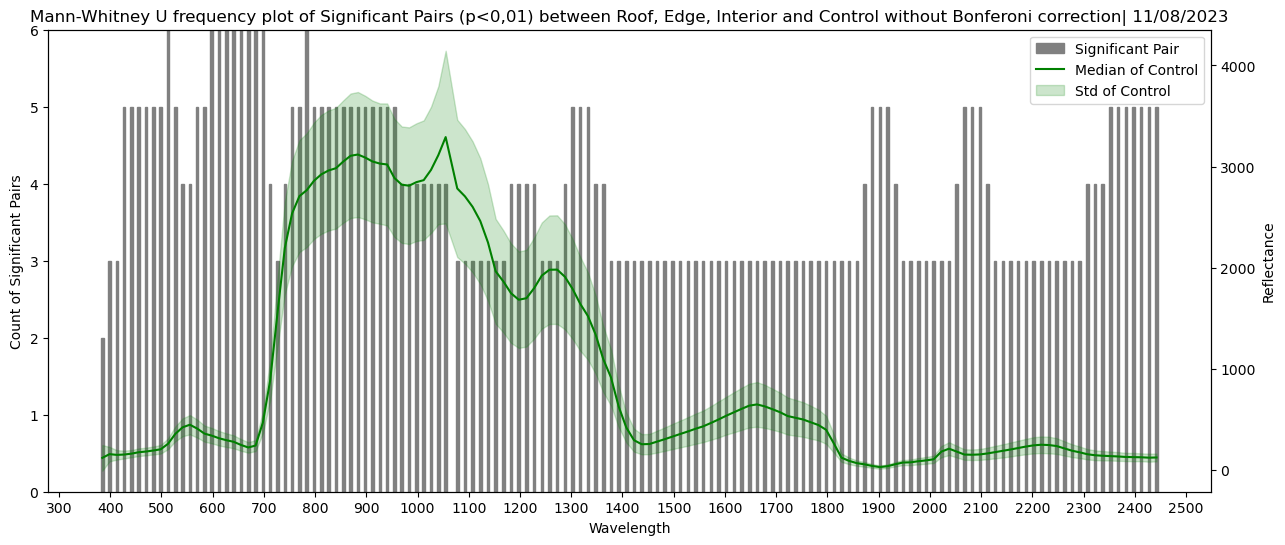

In [205]:
# Skonvertujte hodnoty v DataFrame df_mann na čísla
df_mann_numeric = df_mann.apply(pd.to_numeric, errors='coerce')

# Nastavíme hodnoty menšie ako 0.01 na 1 a ostatné na 0
df_mann_filtered = df_mann_numeric[df_mann_numeric[['Control-Interior', 'Control-Roof', 'Control-Edge', 
                                    'Interior-Roof', 'Interior-Edge', 'Edge-Roof']] < 0.01].notna().astype(int)

# Spojíme všetky stĺpce s hodnotami menšími ako 0.01 a spočítame ich pre každý riadok
df_mann_filtered['count'] = df_mann_filtered.sum(axis=1)

# Pripravíme dáta pre median a štandardnú odchýlku
x = df_mann['Wavelength_Number']
y_median = group_d_median['Median']
y_std = group_d_std['Std']

# Vytvoríme obrázok s určitými rozmermi
fig, ax1 = plt.subplots(figsize=(15, 6))

# Vykreslíme histogram na ľavej y-osi s užšími stĺpcami
ax1.bar(x, df_mann_filtered['count'], color='grey', edgecolor='grey', label='Significant Pair', width=5)
ax1.set_ylabel('Frequency')

# Pridáme druhú y-ovú os pre median a štandardnú odchýlku
ax2 = ax1.twinx()
ax2.plot(x, y_median, color='g', label='Median of Control')
ax2.fill_between(x, y_median - y_std, y_median + y_std, color='g', alpha=0.2, label='Std of Control')

# Nastavenie značiek osi y na celé čísla a obmedzenie rozsahu y-ovej osi na 0 až 6
ax1.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax1.set_ylim(0, 6)

# Nastavíme rozsah x-ovej osi
plt.xticks(np.arange(300, 2501, step=100))

# Pridáme legendu
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# Pridáme popisky osí
ax1.set_xlabel('Wavelength')
ax1.set_ylabel('Count of Significant Pairs')
ax2.set_ylabel('Reflectance')

# Pridáme názov grafu
plt.title('Mann-Whitney U frequency plot of Significant Pairs (p<0,01) between Roof, Edge, Interior and Control without Bonferoni correction| 11/08/2023')
plt.savefig('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Mann/Mann_11_08_2023.png')
# Zobrazenie grafu
plt.show()


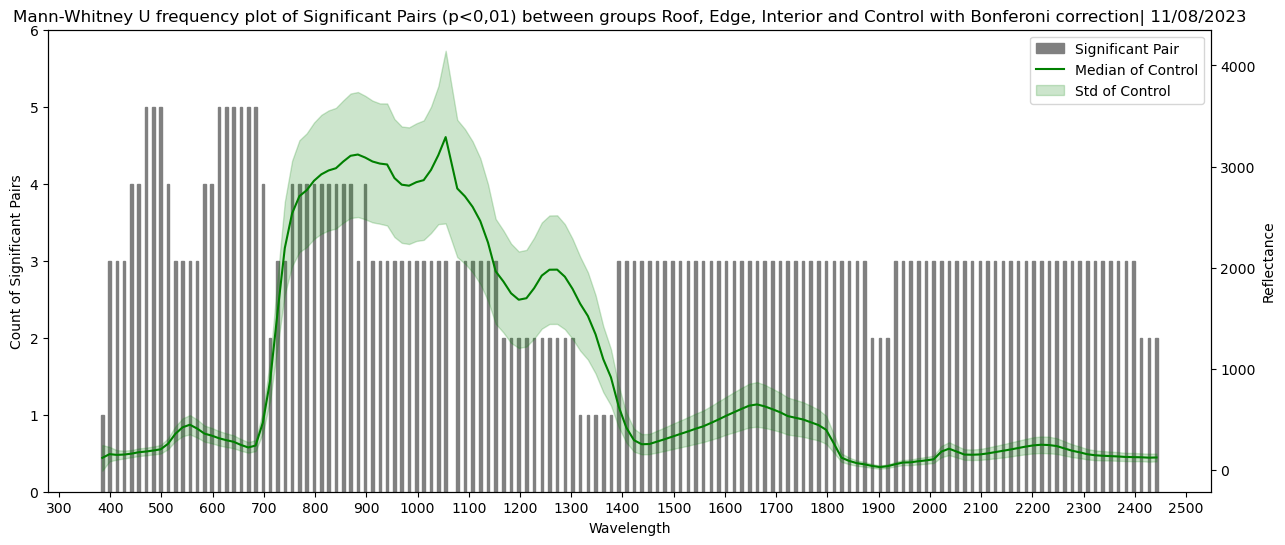

In [206]:
# Skonvertujte hodnoty v DataFrame df_mann_bonf na čísla
df_mann_bonf_numeric = df_mann_bonf.apply(pd.to_numeric, errors='coerce')

# Nastavíme hodnoty menšie ako 0.01 na 1 a ostatné na 0
df_mann_bonf_filtered = df_mann_bonf_numeric[df_mann_bonf_numeric[['Control-Interior', 'Control-Roof', 'Control-Edge', 
                                    'Interior-Roof', 'Interior-Edge', 'Edge-Roof']] < 0.01].notna().astype(int)

# Spojíme všetky stĺpce s hodnotami menšími ako 0.01 a spočítame ich pre každý riadok
df_mann_bonf_filtered['count'] = df_mann_bonf_filtered.sum(axis=1)

# Pripravíme dáta pre median a štandardnú odchýlku
x = df_mann_bonf['Wavelength_Number']
y_median = group_d_median['Median']
y_std = group_d_std['Std']

# Vytvoríme obrázok s určitými rozmermi
fig, ax1 = plt.subplots(figsize=(15, 6))

# Vykreslíme histogram na ľavej y-osi s užšími stĺpcami
ax1.bar(x, df_mann_bonf_filtered['count'], color='grey', edgecolor='grey', label='Significant Pair', width=5)
ax1.set_ylabel('Frequency')

# Pridáme druhú y-ovú os pre median a štandardnú odchýlku
ax2 = ax1.twinx()
ax2.plot(x, y_median, color='g', label='Median of Control')
ax2.fill_between(x, y_median - y_std, y_median + y_std, color='g', alpha=0.2, label='Std of Control')

# Nastavenie značiek osi y na celé čísla a obmedzenie rozsahu y-ovej osi na 0 až 6
ax1.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax1.set_ylim(0, 6)

# Nastavíme rozsah x-ovej osi
plt.xticks(np.arange(300, 2501, step=100))

# Pridáme legendu
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# Pridáme popisky osí
ax1.set_xlabel('Wavelength')
ax1.set_ylabel('Count of Significant Pairs')
ax2.set_ylabel('Reflectance')

# Pridáme názov grafu
plt.title('Mann-Whitney U frequency plot of Significant Pairs (p<0,01) between groups Roof, Edge, Interior and Control with Bonferoni correction| 11/08/2023')
plt.savefig('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Mann/Mann_Bonf_11_08_2023.png')
# Zobrazenie grafu
plt.show()


In [207]:
#---------------------------------------
#---------------------------------------
#----------Dunn test--------------------
#---------------------------------------
#---------------------------------------

In [208]:
# Drop the 'Date' column if it exists
if 'Date' in df_casi.columns:
    df_casi = df_casi.drop(columns='Date')

# Získanie unikátnych skupín a stĺpcov vlnovej dĺžky
groups_casi = df_casi['Group'].unique()
wavelength_columns_casi = [col for col in df_casi.columns if col.startswith('b_')]

# Príprava slovníka na zbieranie p-hodnôt z Dunnovho testu pre každú vlnovú dĺžku
dunn_p_values_dict_casi = {wavelength_casi: {} for wavelength_casi in wavelength_columns_casi}

# Vykonanie Kruskal-Wallis testu a potom Dunnovho testu v prípade, že je významný
for wavelength_casi in wavelength_columns_casi:
    # Príprava dát pre test
    data_for_test_casi = [df_casi[df_casi['Group'] == group][wavelength_casi] for group in groups_casi]
    
    # Vykonanie Kruskal-Wallis testu
    k_stat, k_p = kruskal(*data_for_test_casi)
    
    if k_p < 1:
        # Ak je Kruskal-Wallis test významný, vykonáme Dunnov test
        # Vytvorenie nového DataFrameu pre Dunnov test, ktorý vyžaduje dáta vo "long-formáte"
        data_long_casi = pd.melt(df_casi, id_vars='Group', value_vars=wavelength_casi, var_name='Wavelength', value_name='Value')
        dunn_test_casi = sp.posthoc_dunn(data_long_casi, val_col='Value', group_col='Group', p_adjust='bonferroni')
        
        # Uloženie p-hodnôt z Dunnovho testu do slovníka
        for pair in combinations(groups_casi, 2):
            dunn_p_values_dict_casi[wavelength_casi][f'{pair[0]}-{pair[1]}'] = dunn_test_casi.loc[pair[0], pair[1]]

# Konverzia slovníka na DataFrame pre jednoduchšie manipulácie
dunn_p_values_df_casi = pd.DataFrame(dunn_p_values_dict_casi).T

# Výsledný DataFrame `dunn_p_values_df_casi` bude obsahovať p-hodnoty z Dunnovho testu pre každú dvojicu skupín
# a každú vlnovú dĺžku. Stĺpce budú dvojice skupín a index bude vlnová dĺžka.

dunn_p_values_df_casi.head()


,Control-Interior,Control-Edge,Control-Roof,Interior-Edge,Interior-Roof,Edge-Roof
b_1_384.55,0.206182,1.137537e-04,1.000000,8.753983e-02,1.000000,1.090584e-02
b_2_398.80,1.000000,2.098026e-13,0.111002,2.154302e-12,0.684283,1.263322e-07
b_3_413.05,1.000000,1.242358e-21,0.028978,1.767024e-21,0.178855,7.194258e-13
b_4_427.31,1.000000,3.570982e-25,0.000552,6.439732e-27,0.001236,6.159914e-12
b_5_441.56,1.000000,4.667411e-30,0.000006,5.408022e-30,0.000100,4.380474e-12


In [209]:
# Drop the 'Date' column if it exists
if 'Date' in df_sasi.columns:
    df_sasi = df_sasi.drop(columns='Date')

# Get the unique groups and wavelength columns
groups_sasi = df_sasi['Group'].unique()
wavelength_columns_sasi = [col for col in df_sasi.columns if col.startswith('b_')]

# Prepare a dictionary to collect the p-values from Dunn's test for each wavelength
dunn_p_values_dict_sasi = {wavelength_sasi: {} for wavelength_sasi in wavelength_columns_sasi}

# Perform the Kruskal-Wallis test and then Dunn's test if significant
for wavelength_sasi in wavelength_columns_sasi:
    # Prepare the data for the test
    data_for_test_sasi = [df_sasi[df_sasi['Group'] == group][wavelength_sasi] for group in groups_sasi]
    
    # Perform the Kruskal-Wallis test
    k_stat, k_p = kruskal(*data_for_test_sasi)
    
    if k_p < 1:
        # If the Kruskal-Wallis test is significant, we perform Dunn's test
        # Create a new DataFrame for Dunn's test, which requires data in "long-format"
        data_long_sasi = pd.melt(df_sasi, id_vars='Group', value_vars=wavelength_sasi, var_name='Wavelength', value_name='Value')
        dunn_test_sasi = sp.posthoc_dunn(data_long_sasi, val_col='Value', group_col='Group', p_adjust='bonferroni')
        
        # Store the p-values from Dunn's test in the dictionary
        for pair in combinations(groups_sasi, 2):
            dunn_p_values_dict_sasi[wavelength_sasi][f'{pair[0]}-{pair[1]}'] = dunn_test_sasi.loc[pair[0], pair[1]]

# Convert the dictionary to a DataFrame for easier handling
dunn_p_values_df_sasi = pd.DataFrame(dunn_p_values_dict_sasi).T

# The resulting DataFrame `dunn_p_values_df_sasi` will contain the p-values from Dunn's test for each pair of groups
# and each wavelength. Columns will be the group pairs, and the index will be the wavelengths.

dunn_p_values_df_sasi.head()


,Control-Interior,Control-Edge,Control-Roof,Interior-Edge,Interior-Roof,Edge-Roof
b_49_1077.5,1.0,1.000000,8.204399e-08,1.0,3.678173e-10,8.871916e-11
b_50_1092.5,1.0,1.000000,1.544062e-07,1.0,7.580757e-10,8.990192e-11
b_51_1107.5,1.0,1.000000,3.953081e-07,1.0,2.006606e-09,9.697737e-11
b_52_1122.5,1.0,1.000000,1.041358e-06,1.0,6.194466e-09,9.264398e-11
b_53_1137.5,1.0,0.727265,4.697158e-06,1.0,3.044305e-08,9.173422e-11


In [210]:
# Spojenie výsledkov Dunnovho testu CASI a SASI do jedného DataFrameu
df_dunn = pd.concat([dunn_p_values_df_casi, dunn_p_values_df_sasi])

# Extrahovanie čísla za druhým podčiarkovníkom v stĺpci 'Wavelength'
df_dunn['index'] = df_dunn.index  # len ak index nie je už stĺpec
df_dunn['Wavelength_Number'] = df_dunn['index'].str.extract(r'.*_(\d+\.\d+)$').astype(float)

# Získanie názvov všetkých stĺpcov v df_dunn po spojení a extrakcii
all_columns_dunn = df_dunn.columns.tolist()

# Definovanie nového poradia stĺpcov, kde 'index' a 'Wavelength_Number' sú prvé
new_column_order_dunn = ['index', 'Wavelength_Number'] + [col for col in all_columns_dunn if col not in ['index', 'Wavelength_Number']]

# Reindexovanie DataFrame podľa nového poradia stĺpcov
df_dunn = df_dunn[new_column_order_dunn]

df_dunn


,index,Wavelength_Number,Control-Interior,Control-Edge,Control-Roof,Interior-Edge,Interior-Roof,Edge-Roof
b_1_384.55,b_1_384.55,384.55,0.206182,1.137537e-04,1.000000,8.753983e-02,1.000000,1.090584e-02
b_2_398.80,b_2_398.80,398.80,1.000000,2.098026e-13,0.111002,2.154302e-12,0.684283,1.263322e-07
b_3_413.05,b_3_413.05,413.05,1.000000,1.242358e-21,0.028978,1.767024e-21,0.178855,7.194258e-13
b_4_427.31,b_4_427.31,427.31,1.000000,3.570982e-25,0.000552,6.439732e-27,0.001236,6.159914e-12
b_5_441.56,b_5_441.56,441.56,1.000000,4.667411e-30,0.000006,5.408022e-30,0.000100,4.380474e-12
...,...,...,...,...,...,...,...,...
b_136_2382.5,b_136_2382.5,2382.50,1.000000,6.409674e-18,0.000254,1.984581e-15,0.014971,2.136172e-06
b_137_2397.5,b_137_2397.5,2397.50,1.000000,5.429537e-18,0.000313,4.212082e-16,0.010121,1.474386e-06
b_138_2412.5,b_138_2412.5,2412.50,1.000000,1.823353e-18,0.000043,6.336580e-17,0.001215,8.254280e-06
b_139_2427.5,b_139_2427.5,2427.50,1.000000,5.295529e-16,0.000227,1.303736e-14,0.004367,3.576019e-05


In [211]:
# Uloženie df_dunn (teda pároveho Dunnovho testu) do súboru CSV
df_dunn.to_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Dunn/dunn_df_11_08_2023_all.csv', index=False, sep=',')
print("DataFrame bol úspešne uložený do súboru 'dunn_df_03_06_2022_all.csv'.")

DataFrame bol úspešne uložený do súboru 'dunn_df_03_06_2022_all.csv'.


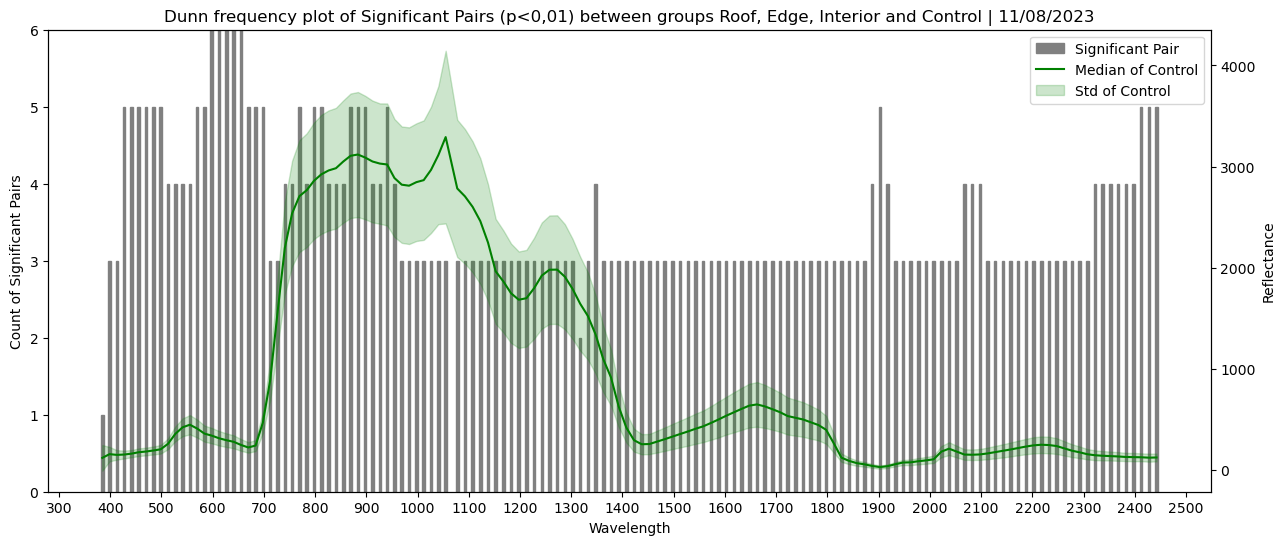

In [212]:
# Skonvertujte hodnoty v DataFrame df_dunn na čísla
df_dunn_numeric = df_dunn.apply(pd.to_numeric, errors='coerce')

# Nastavíme hodnoty menšie ako 0.01 na 1 a ostatné na 0
df_dunn_filtered = df_dunn_numeric[df_dunn_numeric[['Control-Interior', 'Control-Roof', 'Control-Edge', 
                                    'Interior-Roof', 'Interior-Edge', 'Edge-Roof']] < 0.01].notna().astype(int)

# Spojíme všetky stĺpce s hodnotami menšími ako 0.01 a spočítame ich pre každý riadok
df_dunn_filtered['count'] = df_dunn_filtered.sum(axis=1)

# Pripravíme dáta pre median a štandardnú odchýlku
x = df_dunn['Wavelength_Number']
y_median = group_d_median['Median']
y_std = group_d_std['Std']

# Vytvoríme obrázok s určitými rozmermi
fig, ax1 = plt.subplots(figsize=(15, 6))

# Vykreslíme histogram na ľavej y-osi s užšími stĺpcami
ax1.bar(x, df_dunn_filtered['count'], color='grey', edgecolor='grey', label='Significant Pair', width=5)
ax1.set_ylabel('Frequency')

# Pridáme druhú y-ovú os pre median a štandardnú odchýlku
ax2 = ax1.twinx()
ax2.plot(x, y_median, color='g', label='Median of Control')
ax2.fill_between(x, y_median - y_std, y_median + y_std, color='g', alpha=0.2, label='Std of Control')

# Nastavenie značiek osi y na celé čísla a obmedzenie rozsahu y-ovej osi na 0 až 6
ax1.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax1.set_ylim(0, 6)

# Nastavíme rozsah x-ovej osi
plt.xticks(np.arange(300, 2501, step=100))

# Pridáme legendu
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# Pridáme popisky osí
ax1.set_xlabel('Wavelength')
ax1.set_ylabel('Count of Significant Pairs')
ax2.set_ylabel('Reflectance')

# Pridáme názov grafu
plt.title('Dunn frequency plot of Significant Pairs (p<0,01) between groups Roof, Edge, Interior and Control | 11/08/2023')
plt.savefig('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Dunn/Dunn_11_08_2023.png')
# Zobrazenie grafu
plt.show()
